# Support Vector Machine(SVM)
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:



# Types of SVM
Linear SVM: Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

Non-linear SVM: Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

# Hyperplane:
There can be multiple lines/decision boundaries to segregate the classes in n-dimensional space, but we need to find out the best decision boundary that helps to classify the data points. This best boundary is known as the hyperplane of SVM.

The dimensions of the hyperplane depend on the features present in the dataset, which means if there are 2 features (as shown in image), then hyperplane will be a straight line. And if there are 3 features, then hyperplane will be a 2-dimension plane.

We always create a hyperplane that has a maximum margin, which means the maximum distance between the data points.

# Support Vectors:
The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector. Since these vectors support the hyperplane, hence called a Support vector


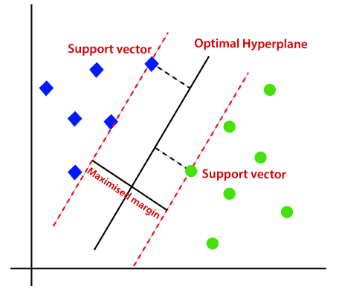

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split


![](kkk.png)

In [4]:
df = pd.read_csv(  "C:\\Users\\hp\\Desktop\\CG  data science files\\iris.csv",
                 names=['s_length', 's_width', 'p_length', 'p_width', 'class'])
df

,s_length,s_width,p_length,p_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   s_length  150 non-null    float64
 1   s_width   150 non-null    float64
 2   p_length  150 non-null    float64
 3   p_width   150 non-null    float64
 4   class     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.head()

,s_length,s_width,p_length,p_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,s_length,s_width,p_length,p_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
features = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

In [9]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
labels

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features, labels,test_size=0.3,random_state=0)

In [12]:
x_train,x_test,y_train,y_test

(array([[5. , 2. , 3.5, 1. ],
        [6.5, 3. , 5.5, 1.8],
        [6.7, 3.3, 5.7, 2.5],
        [6. , 2.2, 5. , 1.5],
        [6.7, 2.5, 5.8, 1.8],
        [5.6, 2.5, 3.9, 1.1],
        [7.7, 3. , 6.1, 2.3],
        [6.3, 3.3, 4.7, 1.6],
        [5.5, 2.4, 3.8, 1.1],
        [6.3, 2.7, 4.9, 1.8],
        [6.3, 2.8, 5.1, 1.5],
        [4.9, 2.5, 4.5, 1.7],
        [6.3, 2.5, 5. , 1.9],
        [7. , 3.2, 4.7, 1.4],
        [6.5, 3. , 5.2, 2. ],
        [6. , 3.4, 4.5, 1.6],
        [4.8, 3.1, 1.6, 0.2],
        [5.8, 2.7, 5.1, 1.9],
        [5.6, 2.7, 4.2, 1.3],
        [5.6, 2.9, 3.6, 1.3],
        [5.5, 2.5, 4. , 1.3],
        [6.1, 3. , 4.6, 1.4],
        [7.2, 3.2, 6. , 1.8],
        [5.3, 3.7, 1.5, 0.2],
        [4.3, 3. , 1.1, 0.1],
        [6.4, 2.7, 5.3, 1.9],
        [5.7, 3. , 4.2, 1.2],
        [5.4, 3.4, 1.7, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [6.9, 3.1, 4.9, 1.5],
        [4.6, 3.1, 1.5, 0.2],
        [5.9, 3. , 5.1, 1.8],
        [5.1, 2.5, 3. , 1.1],
        [4

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [14]:
C=1
svc = svm.SVC(kernel='linear',C=1)
svc.fit(features,labels)
y_pred = svc.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [15]:
y_pred.shape

(45,)

# accuracy

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777777777777777

# classification report

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45




# data visualization using matplotlib & seaborn

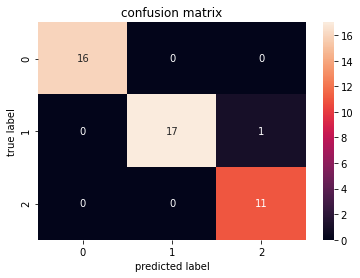

In [175]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_mat,annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('confusion matrix')
plt.show()


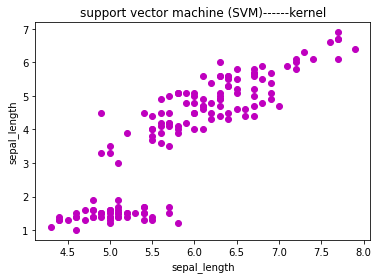

In [185]:
import matplotlib
from matplotlib import pyplot as plt

x=df['s_length']
y=df['p_length']

plt.scatter(x,y,color='m' )

plt.xlabel('sepal_length')
plt.ylabel('sepal_length')

plt.title("support vector machine (SVM)------kernel")
plt.show()

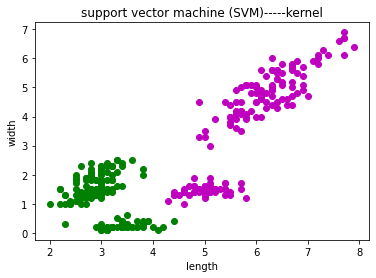

In [191]:
import matplotlib
from matplotlib import pyplot as plt

x=df['s_length']
y=df['p_length']
x1=df['s_width']
y1=df['p_width']
plt.scatter(x,y,color='m' )
plt.scatter(x1,y1,color='g' )

plt.xlabel('length')
plt.ylabel('width')

plt.title("support vector machine (SVM)-----kernel")
plt.show()

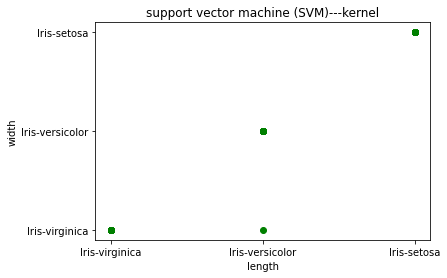

In [180]:
import matplotlib
from matplotlib import pyplot as plt

plt.scatter(y_test,y_pred,color='g' )
plt.xlabel('length')
plt.ylabel('width')
plt.title("support vector machine (SVM)---kernel")
plt.show()
